<a href="https://colab.research.google.com/github/RDGopal/Prompt-Engineering-Guide/blob/main/Lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Processing

In [3]:
import pandas as pd
import re
import nltk

In [4]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

# Download extra packages

In [7]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Read the file

In [8]:
df = pd.read_csv('/content/drive/MyDrive/sms_spam.csv')

In [ ]:
df

# Data Preprocessing

In [9]:
# Lowercase
df['text'] = df['text'].str.lower()

In [10]:
# Tokenize
df['tokens'] = df['text'].apply(nltk.word_tokenize)

In [11]:
# get stopwords
stop_words = stopwords.words('english')
extra_words = ['wbs']
stop_words.extend(extra_words)

In [12]:
# Remove stopwords
df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words])

In [13]:
# Create a PorterStemmer object
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

In [14]:
# Lemmatize
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])


In [15]:
# Combine tokens back into a cleaned review
df['text1'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
df[['text','text1']]

In [16]:
# Put it all into a function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

In [17]:

df['text'] = df['text'].apply(preprocess_text)

# Bag-of-Words and tf-idf

In [34]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel,CoherenceModel,TfidfModel,Nmf,LsiModel

In [36]:
# create list of tokens
documents = df['tokens'].tolist()

In [ ]:
documents

In [38]:
# create the dictionary
dictionary = Dictionary(documents) # list of lists (documents)

In [42]:
# Optional if want to see the dictionary
dictionary.save_as_text('testxyz.csv',sort_by_word=True)

In [45]:
# filter extremes from the dictionary (optional, but recommended)
dictionary.filter_extremes(no_below=5, no_above=0.5) # at least appears in 5 documents, no more than 50%

In [46]:
# create bag-of-words representation
corpus = [dictionary.doc2bow(document) for document in documents]

In [ ]:
corpus

In [51]:
# create tf-idf representation
tfidf_model = TfidfModel(corpus)
tfidf_corpus = [tfidf_model[doc] for doc in corpus]

In [ ]:
tfidf_corpus

# Frequency Analysis

In [ ]:
!pip install matplotlib wordcloud


To perform frequency analysis, we need to count how often each word appears in your corpus. We can utilize the dictionary and the Bag-of-Words (BoW) corpus

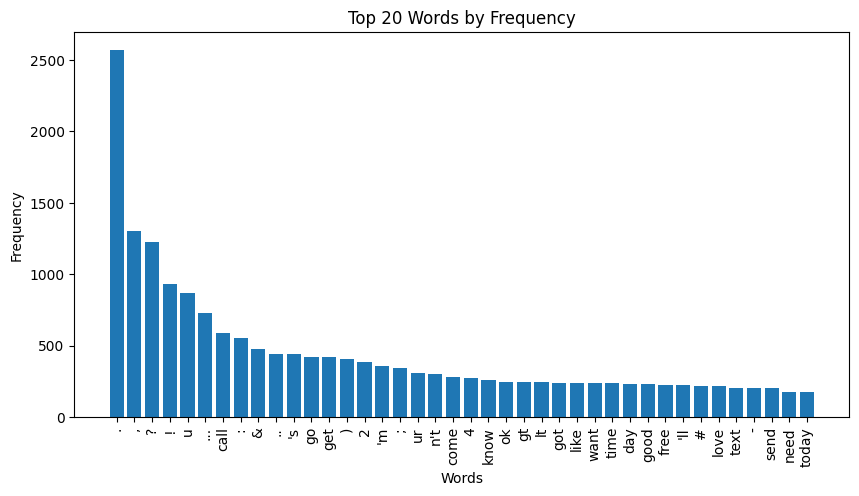

In [54]:
from collections import Counter
import matplotlib.pyplot as plt

# Summing up the counts from the BoW corpus
total_word_count = Counter(word_id for document in corpus for word_id, count in document)

# Mapping back the word IDs to words
mapped_word_counts = [(dictionary[word_id], count) for word_id, count in total_word_count.items()]

# Sort words by frequency
sorted_word_counts = sorted(mapped_word_counts, key=lambda w: w[1], reverse=True)

# Let's plot the top words
plt.figure(figsize=(10, 5))
words, counts = zip(*sorted_word_counts[:40])
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words by Frequency')
plt.xticks(rotation=90)
plt.show()


# Creating a Word Cloud
To create a word cloud, you will need the frequencies in a dictionary format, where the keys are words and the values are their frequencies.

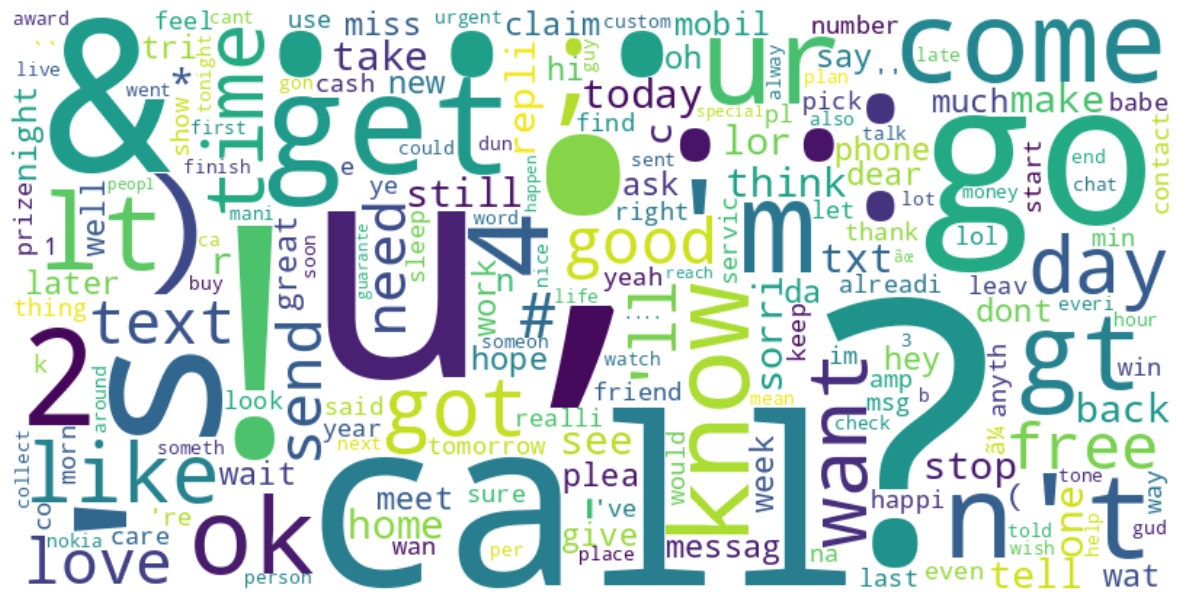

In [55]:
from wordcloud import WordCloud

# Creating a dictionary for word cloud
word_freq_dict = dict(sorted_word_counts)

# Creating word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(word_freq_dict)

# Displaying the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


# Tiny Shakespeare novel

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the text file
with open('/content/tinyshakespeare.txt', 'r') as file:
    text = file.read().lower()

# Tokenize the text
tokens = word_tokenize(text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
len(tokens)

254498

In [20]:
# Get English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from tokens
filtered_tokens = [token for token in tokens if token not in stop_words and token.isalpha()]


In [61]:
len(filtered_tokens)

103465

In [21]:
from collections import Counter

# Count word frequencies
word_counts = Counter(filtered_tokens)


In [ ]:
word_counts

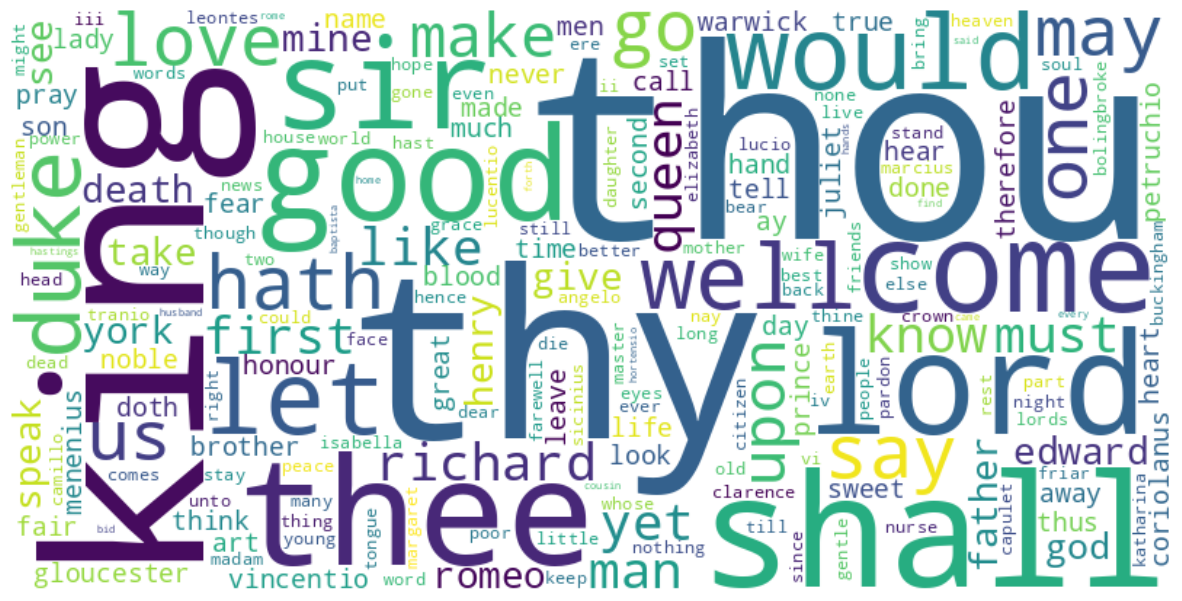

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


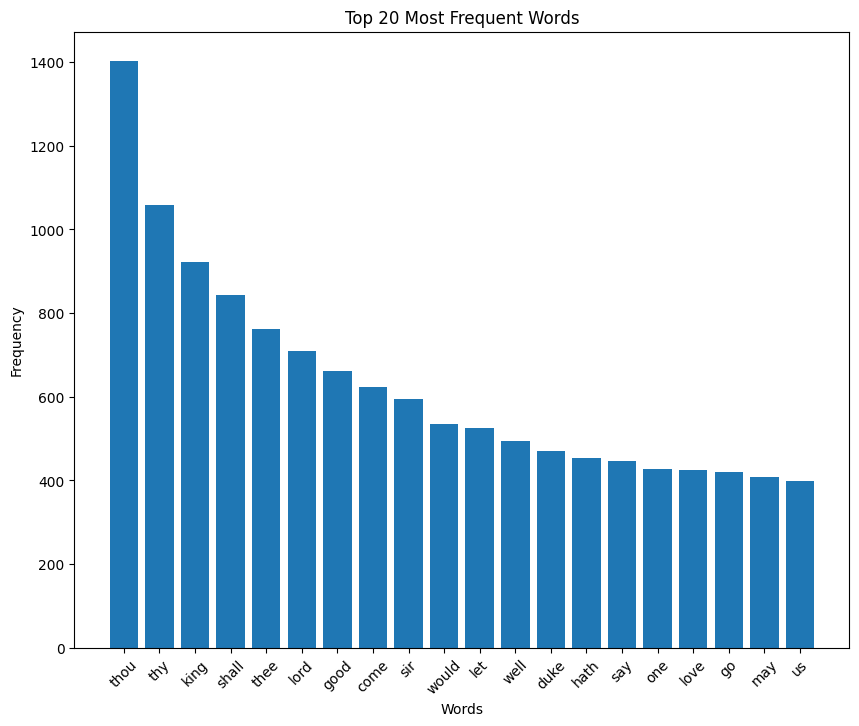

In [23]:
import matplotlib.pyplot as plt

# Get the 20 most common words
most_common_words = word_counts.most_common(20)

# Unpack the words and their frequencies
words, frequencies = zip(*most_common_words)

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)  # Rotate the words on x-axis to avoid overlapping
plt.show()


# POS Tagging

In [5]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [24]:


# POS tagging the filtered tokens
pos_tags = nltk.pos_tag(filtered_tokens)

# Count word frequencies (including the POS tags for uniqueness)
word_counts = Counter(pos_tags)

# Create a list of dictionaries to later convert to a DataFrame
data = [{'Word': word, 'POS': pos, 'WordCount': count} for (word, pos), count in word_counts.items()]

# Create the DataFrame
df_pos = pd.DataFrame(data)

# Display the first few rows of the DataFrame to verify
print(df_pos.head())

      Word  POS  WordCount
0    first   RB        199
1  citizen   JJ         43
2  proceed   NN          6
3     hear  VBP         65
4    speak   JJ        106


## Create POS mapping

In [26]:
pos_tag_full_form = {
    'CC': 'Coordinating conjunction',
    'CD': 'Cardinal number',
    'DT': 'Determiner',
    'EX': 'Existential there',
    'FW': 'Foreign word',
    'IN': 'Preposition or subordinating conjunction',
    'JJ': 'Adjective',
    'JJR': 'Adjective, comparative',
    'JJS': 'Adjective, superlative',
    'LS': 'List item marker',
    'MD': 'Modal',
    'NN': 'Noun, singular or mass',
    'NNS': 'Noun, plural',
    'NNP': 'Proper noun, singular',
    'NNPS': 'Proper noun, plural',
    'PDT': 'Predeterminer',
    'POS': 'Possessive ending',
    'PRP': 'Personal pronoun',
    'PRP$': 'Possessive pronoun',
    'RB': 'Adverb',
    'RBR': 'Adverb, comparative',
    'RBS': 'Adverb, superlative',
    'RP': 'Particle',
    'SYM': 'Symbol',
    'TO': 'to',
    'UH': 'Interjection',
    'VB': 'Verb, base form',
    'VBD': 'Verb, past tense',
    'VBG': 'Verb, gerund or present participle',
    'VBN': 'Verb, past participle',
    'VBP': 'Verb, non-3rd person singular present',
    'VBZ': 'Verb, 3rd person singular present',
    'WDT': 'Wh-determiner',
    'WP': 'Wh-pronoun',
    'WP$': 'Possessive wh-pronoun',
    'WRB': 'Wh-adverb'
}


In [27]:
df_pos['POS Full Form'] = df_pos['POS'].map(pos_tag_full_form)

# Display the DataFrame with the new column
print(df_pos.head())

      Word  POS  WordCount                          POS Full Form
0    first   RB        199                                 Adverb
1  citizen   JJ         43                              Adjective
2  proceed   NN          6                 Noun, singular or mass
3     hear  VBP         65  Verb, non-3rd person singular present
4    speak   JJ        106                              Adjective


In [29]:
# Count total occurrences of words for each POS tag
pos_total_counts = df_pos.groupby('POS').size()

# Display the total occurrences of words for each POS tag
print(pos_total_counts)

POS
CC        32
CD        27
DT        13
EX         2
FW        54
IN       280
JJ      3586
JJR      108
JJS      150
MD        14
NN      4836
NNP       27
NNS     2170
PDT        1
PRP       18
PRP$       8
RB      1057
RBR       75
RBS        8
RP        37
UH         3
VB      1288
VBD      988
VBG      674
VBN      589
VBP     1463
VBZ      645
WDT        8
WP        11
WP$        1
WRB       10
dtype: int64
